# NEKA - Basic Preprocessing

During the following notebook some basic preprocessing techniques will be implemented.

## Imports

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator

tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()

## Load data

In [2]:
def load_images_from_folder(folder):
    images = []
    labels = []
    
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        label = folder.split("/")[-1]  # Extract class label from folder name
        
        if os.path.isfile(path):
            img = cv2.imread(path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # img = plt.imread(path)
            
            # Resize the image to a consistent size if needed
            # For example, you can use: img = cv2.resize(img, (desired_width, desired_height))
            
            images.append(img)
            labels.append(label)
    
    return np.array(images), np.array(labels)

In [3]:
# Specify the paths to your image folders
class1_folder = "../../data/interim/FinalDatasetCropped/Awake"
class2_folder = "../../data/interim/FinalDatasetCropped/Tired"

# Load images and labels for each class
class1_images, class1_labels = load_images_from_folder(class1_folder)
class2_images, class2_labels = load_images_from_folder(class2_folder)

# Optionally, you can concatenate the arrays if needed
all_images = np.concatenate((class1_images, class2_images), axis=0)
all_labels = np.concatenate((class1_labels, class2_labels), axis=0)

# Print the shape of the arrays
print("Class 1 Images Shape:", class1_images.shape)
print("Class 2 Images Shape:", class2_images.shape)
print("All Images Shape:", all_images.shape)  

Class 1 Images Shape: (914, 128, 128, 3)
Class 2 Images Shape: (797, 128, 128, 3)
All Images Shape: (1711, 128, 128, 3)


## Plot Some Images

Check the data has been loaded correctly from the data directory, through some graphically plotting some of the images.

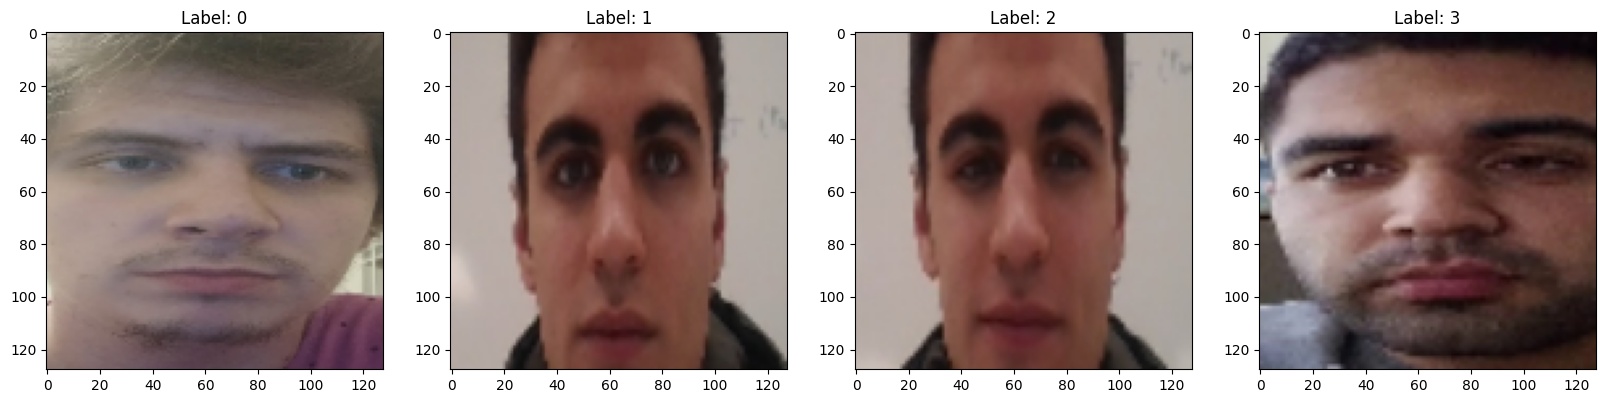

In [4]:
# data_iterator = data.as_numpy_iterator()
# batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(all_images[:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(f"Label: {idx}")  # Display label

## Basic Preprocessing

During the following code cells, some basic preprocessing techniques will be applied.

### Data Augmentation

In [5]:
#This technique helps improve the generalization ability of the model by exposing it to different variations of the original images.
imgTrainGen = ImageDataGenerator(
    rotation_range = 50,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    vertical_flip = True,
    # orizontal_flip = True
)

# Randomly select a subset of images to apply augmentation
num_images = len(all_images)
num_images_to_augment = np.random.randint(1, num_images/3)  # Augment at least one image

# Randomly choose indices for augmentation
augmented_indices = np.random.choice(num_images, size=num_images_to_augment, replace=False)

# Apply data augmentation to the selected subset
for idx in augmented_indices:
    all_images[idx] = imgTrainGen.random_transform(all_images[idx])
    
# Print augmentation info
print("Amount of augmented images:", num_images_to_augment)

Amount of augmented images: 478


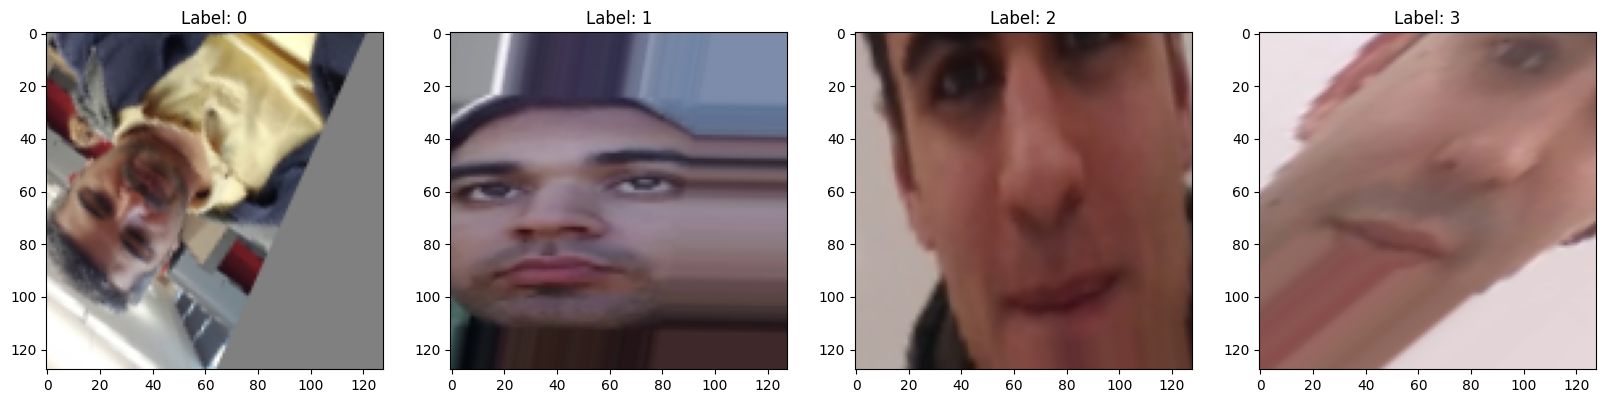

In [6]:
# data_iterator = data.as_numpy_iterator()
# batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(all_images[augmented_indices[:4]]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(f"Label: {idx}")  # Display label

## Save Images

In [7]:
# Function to create class folders within the specified directory
def create_class_folders(output_dir, classes):
    for class_name in classes:
        class_path = os.path.join(output_dir, class_name)
        os.makedirs(class_path, exist_ok=True)

# Function to save images from a dataset to class-specific folders
def save_images(X, y, output_dir, classes):
    create_class_folders(output_dir, classes)

    # Save the images to the specified folder
    for i, (img, label) in enumerate(zip(X, y)):
        class_path = os.path.join(output_dir, label)
        filename = f'image_{len(os.listdir(class_path)) + 1}.png'
        filepath = os.path.join(class_path, filename)
        
        # Save the image
        cv2.imwrite(filepath, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [8]:
# Directories to save the images
output_dir = '../../data/final/FinalDatasetCroppedAugmented/'
os.makedirs(output_dir, exist_ok=True)

class_names = ['Tired', 'Awake']

save_images(all_images, all_labels, output_dir, class_names)
print(f"Processed images set images saved to: {output_dir}")

Processed images set images saved to: ../../data/final/FinalDatasetCroppedAugmented/
